In [1]:
#from customplot import *

#import sqlite3
%autosave 0
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp
from scipy.stats import reciprocal, uniform
from numpy import random
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

Autosave disabled


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [3]:
def printcfm(y_test,y_pred,title='confusion matrix'):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title=title) 

In [4]:
def plotRoc(y_real, y_pred_prob):
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_real, y_pred_prob)
    
    # Calculate AUC
    auc = roc_auc_score(y_real, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.text(1, 0.5, "AUC: %3.3f" % (auc), {'color': 'C2', 'fontsize': 18}, va="bottom", ha="right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


In [5]:
def plot_precision_vs_recall(precisions, recalls):
    plt.figure(figsize=(8, 6))
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1.01, 0, 1])
    plt.show()
    

In [6]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [7]:
#dfFase1=pd.read_csv('baseProjetoTrainOverFase1.csv', index_col=0)
dfFase1=pd.read_csv('baseProjeto_entradaModelo_fase1.csv', index_col=0)

X_train = dfFase1[['ATRIB_MAX1',
        'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
        'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

# X_test = dfFase1[['ATRIB_MAX1',
#         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
#         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

y_train = dfFase1['Perda30']

# y_test = dfFase1['Perda30']

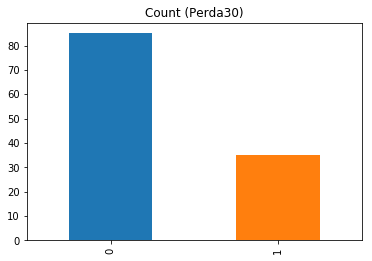

In [8]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_train.value_counts().plot(kind='bar', title='Count (Perda30)');

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index)

<br>
## SGDClassifier

In [11]:
C = 5
alpha = 1 / (C * len(X_train))

In [12]:
steps = [('scaler', StandardScaler()),(('sgd_clf',  SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha, max_iter=100000, random_state=42)))]
pipeline = Pipeline(steps)
scaler = StandardScaler()

In [13]:
random_scaled = pipeline.fit(X_train, y_train)

In [14]:
y_pred = pipeline.predict(X_train) 
accuracy_score(y_train, y_pred)

0.8083333333333333

Confusion matrix, without normalization


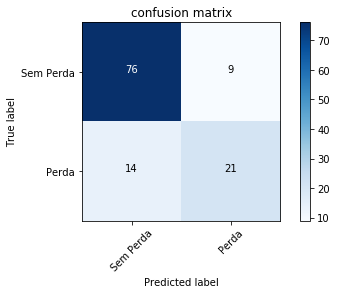

In [15]:
printcfm(y_train,y_pred,title='confusion matrix')

Positive Predictive Value (PPV)
$$Precision=\frac{TP}{TP+FP}$$
<br>
Sensitivity, Hit Rate, True Positive Rate
$$Recall=\frac{TP}{TP+FN}$$
<br>
Harmonic mean between Precision and Recall
$$F1 Score=2 * \frac{Precision * Recall}{Precision + Recall}$$

In [16]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.89      0.87        85
          1       0.70      0.60      0.65        35

avg / total       0.80      0.81      0.80       120



<br>
## SVC

In [17]:
svm_clf = SVC(decision_function_shape="ovr")

In [18]:
#steps = [('scaler', StandardScaler()),(('svm_clf', SVC(decision_function_shape="ovr")))]
#pipeline = Pipeline(steps)
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

## Fine-tunning the model.

### 1 - Random Search

In [19]:
param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10), 'probability' : [True]}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=100, verbose=2)
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] C=9.76268347563095, gamma=0.0026630232785664716, probability=True 
[CV]  C=9.76268347563095, gamma=0.0026630232785664716, probability=True, total=   0.0s
[CV] C=9.76268347563095, gamma=0.0026630232785664716, probability=True 
[CV]  C=9.76268347563095, gamma=0.0026630232785664716, probability=True, total=   0.0s
[CV] C=9.76268347563095, gamma=0.0026630232785664716, probability=True 
[CV]  C=9.76268347563095, gamma=0.0026630232785664716, probability=True, total=   0.0s
[CV] C=4.125354818841789, gamma=0.0011565918919127572, probability=True 
[CV]  C=4.125354818841789, gamma=0.0011565918919127572, probability=True, total=   0.0s
[CV] C=4.125354818841789, gamma=0.0011565918919127572, probability=True 
[CV]  C=4.125354818841789, gamma=0.0011565918919127572, probability=True, total=   0.0s
[CV] C=4.125354818841789, gamma=0.0011565918919127572, probability=True 
[CV]  C=4.125354818841789, gamma=0.0011565918919127572, probabili

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=4.28892026557103, gamma=0.0034698471091583758, probability=True, total=   0.0s
[CV] C=4.97633482839502, gamma=0.00745338269694781, probability=True .
[CV]  C=4.97633482839502, gamma=0.00745338269694781, probability=True, total=   0.0s
[CV] C=4.97633482839502, gamma=0.00745338269694781, probability=True .
[CV]  C=4.97633482839502, gamma=0.00745338269694781, probability=True, total=   0.0s
[CV] C=4.97633482839502, gamma=0.00745338269694781, probability=True .
[CV]  C=4.97633482839502, gamma=0.00745338269694781, probability=True, total=   0.0s
[CV] C=6.12573945840505, gamma=0.02760795689667415, probability=True .
[CV]  C=6.12573945840505, gamma=0.02760795689667415, probability=True, total=   0.0s
[CV] C=6.12573945840505, gamma=0.02760795689667415, probability=True .
[CV]  C=6.12573945840505, gamma=0.02760795689667415, probability=True, total=   0.0s
[CV] C=6.12573945840505, gamma=0.02760795689667415, probability=True .
[CV]  C=6.12573945840505, gamma=0.02760795689667415, probabili

[CV] C=2.98876435145942, gamma=0.08731220494685593, probability=True .
[CV]  C=2.98876435145942, gamma=0.08731220494685593, probability=True, total=   0.0s
[CV] C=2.98876435145942, gamma=0.08731220494685593, probability=True .
[CV]  C=2.98876435145942, gamma=0.08731220494685593, probability=True, total=   0.0s
[CV] C=2.98876435145942, gamma=0.08731220494685593, probability=True .
[CV]  C=2.98876435145942, gamma=0.08731220494685593, probability=True, total=   0.0s
[CV] C=3.0468698625360684, gamma=0.06467183827804888, probability=True 
[CV]  C=3.0468698625360684, gamma=0.06467183827804888, probability=True, total=   0.0s
[CV] C=3.0468698625360684, gamma=0.06467183827804888, probability=True 
[CV]  C=3.0468698625360684, gamma=0.06467183827804888, probability=True, total=   0.0s
[CV] C=3.0468698625360684, gamma=0.06467183827804888, probability=True 
[CV]  C=3.0468698625360684, gamma=0.06467183827804888, probability=True, total=   0.0s
[CV] C=5.382567590733776, gamma=0.006470600002173626, p

[CV]  C=1.062332698721278, gamma=0.035174023720897514, probability=True, total=   0.0s
[CV] C=1.062332698721278, gamma=0.035174023720897514, probability=True 
[CV]  C=1.062332698721278, gamma=0.035174023720897514, probability=True, total=   0.0s
[CV] C=1.5148369533383845, gamma=0.014634565007639457, probability=True 
[CV]  C=1.5148369533383845, gamma=0.014634565007639457, probability=True, total=   0.0s
[CV] C=1.5148369533383845, gamma=0.014634565007639457, probability=True 
[CV]  C=1.5148369533383845, gamma=0.014634565007639457, probability=True, total=   0.0s
[CV] C=1.5148369533383845, gamma=0.014634565007639457, probability=True 
[CV]  C=1.5148369533383845, gamma=0.014634565007639457, probability=True, total=   0.0s
[CV] C=3.534819056943396, gamma=0.01917205106827156, probability=True 
[CV]  C=3.534819056943396, gamma=0.01917205106827156, probability=True, total=   0.0s
[CV] C=3.534819056943396, gamma=0.01917205106827156, probability=True 
[CV]  C=3.534819056943396, gamma=0.01917205

[CV]  C=8.338883928462838, gamma=0.00491990132138216, probability=True, total=   0.0s
[CV] C=8.338883928462838, gamma=0.00491990132138216, probability=True 
[CV]  C=8.338883928462838, gamma=0.00491990132138216, probability=True, total=   0.0s
[CV] C=2.3354213318444175, gamma=0.053589518725044354, probability=True 
[CV]  C=2.3354213318444175, gamma=0.053589518725044354, probability=True, total=   0.0s
[CV] C=2.3354213318444175, gamma=0.053589518725044354, probability=True 
[CV]  C=2.3354213318444175, gamma=0.053589518725044354, probability=True, total=   0.0s
[CV] C=2.3354213318444175, gamma=0.053589518725044354, probability=True 
[CV]  C=2.3354213318444175, gamma=0.053589518725044354, probability=True, total=   0.0s
[CV] C=6.918723916973439, gamma=0.012307540226346897, probability=True 
[CV]  C=6.918723916973439, gamma=0.012307540226346897, probability=True, total=   0.0s
[CV] C=6.918723916973439, gamma=0.012307540226346897, probability=True 
[CV]  C=6.918723916973439, gamma=0.01230754

[CV]  C=3.3587869161179453, gamma=0.054672325753935616, probability=True, total=   0.0s
[CV] C=3.3587869161179453, gamma=0.054672325753935616, probability=True 
[CV]  C=3.3587869161179453, gamma=0.054672325753935616, probability=True, total=   0.0s
[CV] C=3.3587869161179453, gamma=0.054672325753935616, probability=True 
[CV]  C=3.3587869161179453, gamma=0.054672325753935616, probability=True, total=   0.0s
[CV] C=4.122558997343107, gamma=0.006409070894728998, probability=True 
[CV]  C=4.122558997343107, gamma=0.006409070894728998, probability=True, total=   0.0s
[CV] C=4.122558997343107, gamma=0.006409070894728998, probability=True 
[CV]  C=4.122558997343107, gamma=0.006409070894728998, probability=True, total=   0.0s
[CV] C=4.122558997343107, gamma=0.006409070894728998, probability=True 
[CV]  C=4.122558997343107, gamma=0.006409070894728998, probability=True, total=   0.0s
[CV] C=1.3160784093230218, gamma=0.018445812729382085, probability=True 
[CV]  C=1.3160784093230218, gamma=0.0184

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    1.9s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018157125828>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018157125EF0>, 'probability': [True]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [20]:
rnd_search_cv.best_estimator_

SVC(C=4.125354818841789, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0011565918919127572,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [21]:
rnd_search_cv.best_score_

0.725

### 2 - Grid Search

In [22]:
param_grid = [
        #{'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
         {'kernel': ['poly','rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0], 
         'degree': [2, 3, 4, 5 ,6],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0],
         'probability' : [True]},
    ]
grid_search_cv = GridSearchCV(svm_clf, param_grid, verbose=3, n_jobs=-1)
grid_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 350 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:    9.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['poly', 'rbf'], 'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0], 'degree': [2, 3, 4, 5, 6], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0], 'probability': [True]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [23]:
grid_search_cv.best_estimator_

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
grid_search_cv.best_score_

0.7416666666666667

In [25]:
if grid_search_cv.best_score_ > rnd_search_cv.best_score_:
    final_model = grid_search_cv.best_estimator_
    print('Grid Search')
else:
    final_model = rnd_search_cv.best_estimator_
    print('Random Search')

Grid Search


In [26]:
#final_model = rnd_search_cv.best_estimator_

In [27]:
final_model = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5, verbose=3, n_jobs=-1)
print(cv_scores)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s


[0.67 0.71 0.71 0.83 0.79]


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


## Predicting the Classes in Trainning Set

In [29]:
final_model.fit(X_train_scaled, y_train)
y_pred = final_model.predict(X_train_scaled)
y_pred_prob = final_model.predict_proba(X_train_scaled)[:,1]

In [30]:
y_pred_prob;

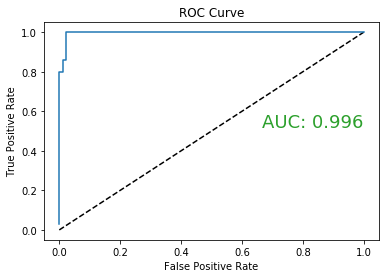

In [31]:
plotRoc(y_train, y_pred_prob)

<font color='red'>
Notes:<br>
The probability model is created using cross validation, so the results can be slightly different than those obtained by predict. Also, it will produce meaningless results on very small datasets.</font>

Confusion matrix, without normalization


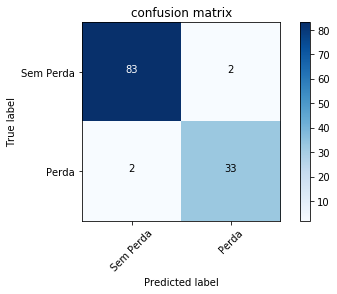

In [32]:
printcfm(y_train,y_pred,title='confusion matrix')

## Evaluating the model with Cross-Validation

In [33]:
y_pred_prob = final_model.predict_proba(X_train_scaled)[:,1]

In [34]:
y_scores = cross_val_predict(final_model, X_train_scaled, y_train, cv=3, verbose=3, method='predict_proba')

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [35]:
y_train_pred = cross_val_predict(final_model, X_train_scaled, y_train, cv=3, verbose=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


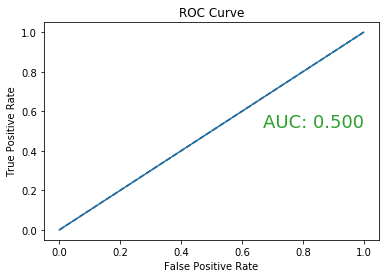

In [36]:
plotRoc(y_train, y_train_pred)

<font color='red'>
Notes:<br>
The probability model is created using cross validation, so the results can be slightly different than those obtained by predict. Also, it will produce meaningless results on very small datasets.</font>

In [37]:
auc_train = roc_auc_score(y_train, y_train_pred)
auc_train

0.5

Confusion matrix, without normalization


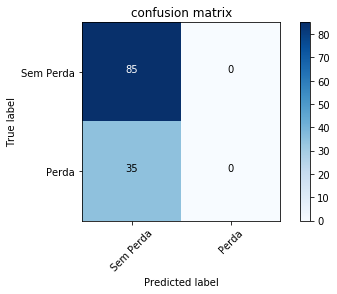

In [38]:
printcfm(y_train,y_train_pred,title='confusion matrix')

In [39]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.71      1.00      0.83        85
          1       0.00      0.00      0.00        35

avg / total       0.50      0.71      0.59       120



C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Precision/Recall Tradeoff

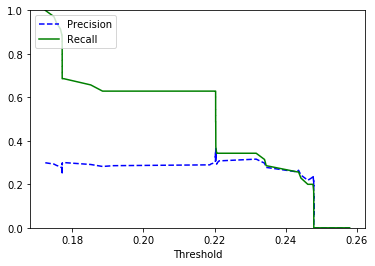

In [40]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [41]:
cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=3)
print(cv_scores)
print(np.mean(cv_scores))

[0.71 0.7  0.72]
0.7084219303731499


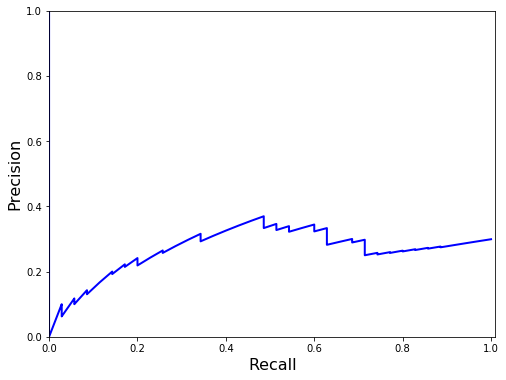

In [42]:
plot_precision_vs_recall(precisions, recalls)

# Evaluating the model with LOO

In [43]:
loo = LeaveOneOut()
loo.get_n_splits(dfFase1)

120

In [44]:
for train, test in loo.split(dfFase1):
     print("%s %s" % (train, test))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119] [1]
[  0   1   3   4   5   6

In [45]:
cv=loo

In [46]:
y_scores = cross_val_predict(final_model, X_train_scaled, y_train, cv=cv, verbose=10, method='predict_proba', n_jobs=-1)

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1908s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0360s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    7.9s finished


In [47]:
y_train_pred = cross_val_predict(final_model, X_train_scaled, y_train, cv=cv, verbose=10)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    0.8s finished


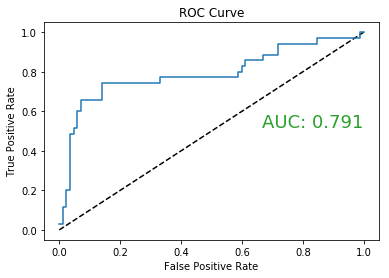

In [48]:
plotRoc(y_train, y_scores)

In [49]:
auc_train = roc_auc_score(y_train, y_scores)
auc_train

0.7909243697478991

Confusion matrix, without normalization


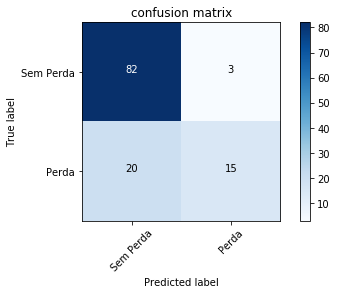

In [50]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [51]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.80      0.96      0.88        85
          1       0.83      0.43      0.57        35

avg / total       0.81      0.81      0.79       120



# Evaluating the model with Repeated K fold

In [52]:
def perform_repeated_cv(X, y , model):
    #set random seed for repeatability
    random.seed(1)

    #set the number of repetitions
    n_reps = 45

    # perform repeated cross validation
    accuracy_scores = np.zeros(n_reps)
    precision_scores=  np.zeros(n_reps)
    recall_scores =  np.zeros(n_reps)
    auc_scores =  np.zeros(n_reps)
    #result_pred = pd.DataFrame(index=np.arange(30))
    result_pred = y
    
    ##############################
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig = plt.figure(figsize=(20, 10))
    ###############################

    for u in range(n_reps):

        #randomly shuffle the dataset
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
#         X = X[indices]
#         y = y[indices] #dataset has been randomly shuffled
        X = X.iloc[indices]
        y = y.iloc[indices] #dataset has been randomly shuffled

        #initialize vector to keep predictions from all folds of the cross-validation
        y_predicted = np.zeros(y.shape)
        probas = np.zeros(y.shape)

        #perform 10-fold cross validation
        kf = KFold(n_splits=4 , random_state=142)
        for train, test in kf.split(X):

            #split the dataset into training and testing
#             X_train = X[train]
#             X_test = X[test]
#             y_train = y[train]
#             y_test = y[test]
            X_train = X.iloc[train]
            X_test = X.iloc[test]
            y_train = y.iloc[train]
            y_test = y.iloc[test]

#             #standardization
#             scaler = preprocessing.StandardScaler().fit(X_train)
#             X_train = scaler.transform(X_train)
#             X_test = scaler.transform(X_test)

            #train model
            clf = model
            clf.fit(X_train, y_train)

            #make predictions on the testing set
            y_predicted[test] = clf.predict(X_test)
#            print(y_predicted[test],y_test,type(y_predicted))
            #y_train_pred_array = np.append(y_train_pred_array,y_train_pred)
#            print(result_pred)



            
            ###############################plot
#             probas_ = clf.predict_proba(X_test)
            probas[test] = clf.predict_proba(X_test)[:, 1]
#             print(probas[test], type(probas), probas.size)
         
#        print(y,y_predicted)
        #result_pred = y
        df_pred = pd.DataFrame(y_predicted, index=y.index,columns=[u])
        result_pred = pd.concat([result_pred, df_pred], axis=1) 
        

                
    
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y, probas)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        #roc_auc = auc(fpr, tpr) - Change to obtain AUC by predict proba
        roc_auc = roc_auc_score(y, y_predicted)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
        label='ROC fold %d (AUC = %0.2f)' % (u, roc_auc))

            
            ################################

        #record scores
        accuracy_scores[u] = accuracy_score(y, y_predicted)
        precision_scores[u] = precision_score(y, y_predicted)
        recall_scores[u]  = recall_score(y, y_predicted)
        auc_scores[u] = roc_auc_score(y, y_predicted)

    ###############################plot
    print(result_pred)
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
#     mean_auc = auc(mean_fpr, mean_tpr)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)


    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    #plt.legend(loc="lower right")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               fancybox=True, shadow=True, ncol=5)
    plt.show()
    ################################
    
    #return all scores
    return accuracy_scores, precision_scores, recall_scores, auc_scores, result_pred

     Perda30    0    1    2    3    4    5    6    7    8    9   10   11   12  \
0          1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4          1  1.0  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0   
5          1  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0   
6          1  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0   
7          1  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0   
8          1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9          1  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0   
10         0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11         0  0.0  0.0  0.0 

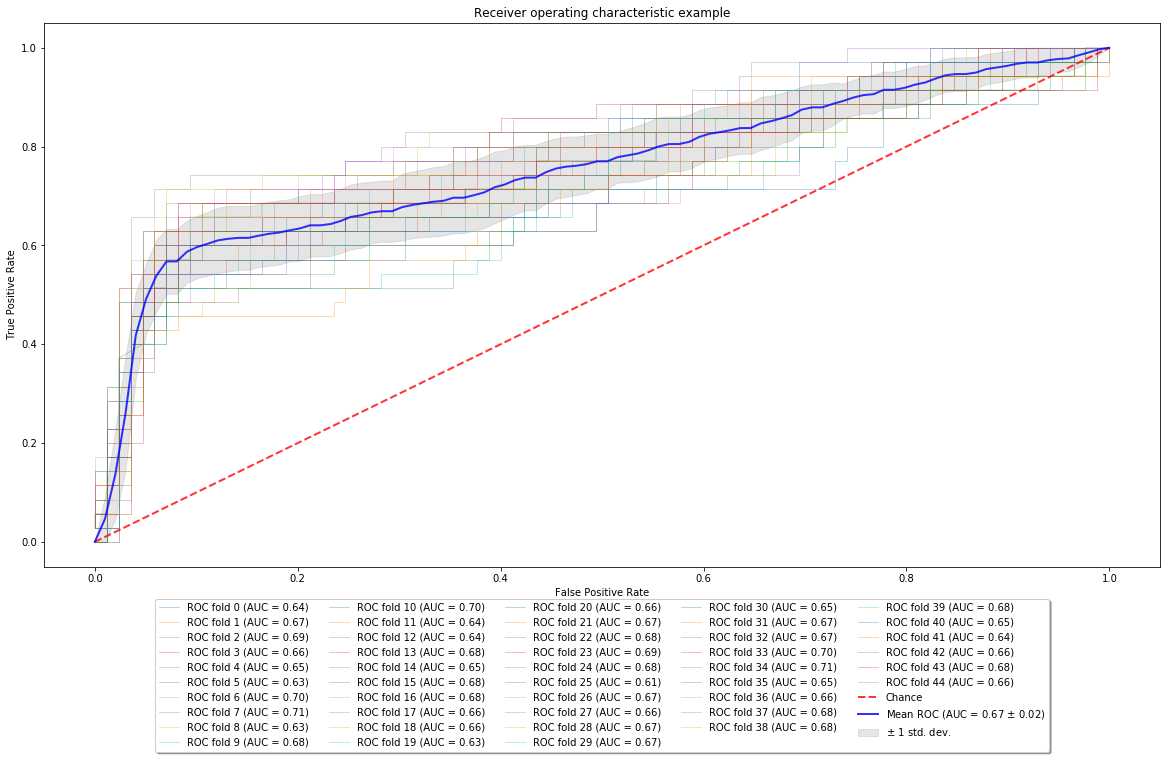

In [53]:
accuracy_scores, precision_scores, recall_scores, auc_scores, result_pred = perform_repeated_cv(X_train_scaled, y_train, final_model)

In [55]:
print(accuracy_scores, accuracy_scores.size)

[0.78 0.79 0.81 0.78 0.78 0.77 0.82 0.82 0.77 0.8  0.81 0.78 0.78 0.8
 0.78 0.8  0.8  0.79 0.79 0.77 0.78 0.79 0.8  0.81 0.8  0.76 0.79 0.78
 0.79 0.8  0.78 0.79 0.79 0.81 0.82 0.78 0.78 0.8  0.8  0.79 0.78 0.78
 0.79 0.79 0.79] 45


In [56]:
print(precision_scores, recall_scores)

[0.79 0.81 0.88 0.76 0.8  0.73 0.88 0.84 0.73 0.82 0.83 0.79 0.79 0.82
 0.8  0.82 0.82 0.86 0.86 0.77 0.76 0.81 0.82 0.88 0.82 0.75 0.81 0.76
 0.81 0.87 0.8  0.81 0.81 0.83 0.84 0.75 0.76 0.82 0.82 0.78 0.8  0.79
 0.86 0.78 0.86] [0.31 0.37 0.4  0.37 0.34 0.31 0.43 0.46 0.31 0.4  0.43 0.31 0.31 0.4
 0.34 0.4  0.4  0.34 0.34 0.29 0.37 0.37 0.4  0.4  0.4  0.26 0.37 0.37
 0.37 0.37 0.34 0.37 0.37 0.43 0.46 0.34 0.37 0.4  0.4  0.4  0.34 0.31
 0.34 0.4  0.34]


In [57]:
print(auc_scores, auc_scores.size)

[0.64 0.67 0.69 0.66 0.65 0.63 0.7  0.71 0.63 0.68 0.7  0.64 0.64 0.68
 0.65 0.68 0.68 0.66 0.66 0.63 0.66 0.67 0.68 0.69 0.68 0.61 0.67 0.66
 0.67 0.67 0.65 0.67 0.67 0.7  0.71 0.65 0.66 0.68 0.68 0.68 0.65 0.64
 0.66 0.68 0.66] 45


No handles with labels found to put in legend.


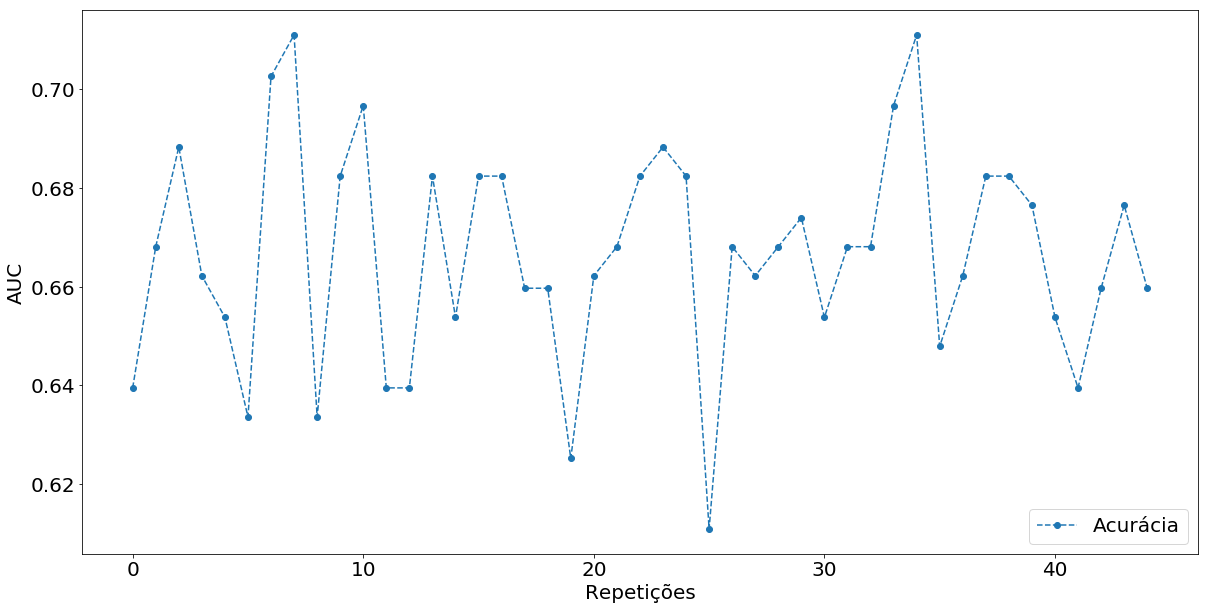

In [58]:
fig = plt.figure(figsize=(20, 10))
plt.plot(auc_scores, '--o')
plt.legend(loc='lower right')
plt.ylabel('AUC', fontsize=20);
plt.xlabel('Repetições', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.tick_params(axis='both', which='minor', labelsize=18);
#plt.xlim([0, 18])
#plt.ylim([0.5, 1])
plt.legend(('Acurácia', 'AUC'), loc='lower right', prop={'size': 20})
plt.show()

In [59]:
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(auc_scores), np.std(auc_scores)))

Accuracy: 0.67 (+/- 0.02)


In [60]:
result_pred.to_csv('result_kfold_SVM.csv', encoding='utf-8')

# Draft

## Predicting the Classes in Test Set

In [54]:
y_pred = final_model.predict(X_test_scaled)
y_pred_prob = final_model.predict_proba(X_test_scaled)[:,1]

NameError: name 'X_test_scaled' is not defined

In [ ]:
plotRoc(y_test, y_pred_prob)

<font color='red'>
Notes:<br>
The probability model is created using cross validation, so the results can be slightly different than those obtained by predict. Also, it will produce meaningless results on very small datasets.</font>

In [ ]:
roc_auc_score(y_test, y_pred_prob)

In [ ]:
printcfm(y_test,y_pred,title='confusion matrix')

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
X=np.concatenate((X_train_scaled,X_test_scaled),axis=0)
# print(X)
y=np.append(y_train,y_test)
# print(y)

In [ ]:
print(__doc__)

param_range = np.logspace(-6, 2, 5)

train_scores, test_scores = validation_curve(
    final_model, X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="roc_auc", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVC")
plt.xlabel("$\gamma$")
plt.ylabel("AUC")
#plt.ylim(0.0, 1.1)
#plt.xlim(-1, 22)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
# param_range = np.logspace(-6, 20, 20)

# viz = ValidationCurve(
#     final_model, param_name="gamma", param_range=param_range,
#     logx=True, cv=10, scoring="precision", n_jobs=-1,
# )

# viz.fit(X, y)
# viz.poof()

# Add learning curves